In [53]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import  ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pickle

In [54]:
# Importing Dataset
Dummy_Var1= pd.read_csv(r'C:\Users\Training Team\Desktop\ExcelR\Assignments\SVM\SalaryData_Train(1).csv')
Dummy_Var2= pd.read_csv(r'C:\Users\Training Team\Desktop\ExcelR\Assignments\SVM\SalaryData_Test(1).csv')

In [55]:
# copying data to other variable
Salary_train= Dummy_Var1.copy()
Salary_test= Dummy_Var2.copy()

## **Asking Basic Questions on Data**

***1. Shape of data***

In [56]:
Salary_train.shape, Salary_test.shape

((30161, 14), (15060, 14))

***2. How does the data look like?***

In [57]:
Salary_train.sample(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
16556,21,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,35,United-States,<=50K
12923,19,Private,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,20,United-States,<=50K
3513,19,Private,Some-college,10,Never-married,Farming-fishing,Own-child,White,Male,0,0,66,United-States,<=50K
6435,29,Local-gov,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
13250,28,Private,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,15,United-States,<=50K


***3. What are the data types of the features in data?***

In [58]:
Salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [59]:
Salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


Objservations:

1. age can be transformed to int32

2. education no can be converted to int32

3. no null values values

***4. Any missing values?***

In [60]:
Salary_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [61]:
Salary_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

***5. Any Duplicate values in data?***


In [62]:
Salary_train.duplicated().sum()

3258

Observation:

There are 3258 observations with duplicate entries in train set

In [63]:
Salary_test.duplicated().sum()

930

Observation:

There are 930 observations with duplicate entries in test set

In [64]:
#Dropping duplicate rows
Salary_train = Salary_train.drop_duplicates()
Salary_test= Salary_test.drop_duplicates()

In [65]:
Salary_train.shape, Salary_test.shape

((26903, 14), (14130, 14))

***6. How does data look numerically?***

In [66]:
Salary_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.144296,1215.443259,98.427499,41.164591
std,13.188825,2.620154,7805.366384,425.493211,12.347051
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


***7. Correlation between numerical features***

In [67]:
Salary_train['Salary1']=pd.get_dummies(Salary_train['Salary'], drop_first=True)
Salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,Salary1
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [68]:
Salary_train.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary1
age,1.000000,0.038048,0.077235,0.052684,0.072529,0.223502
educationno,0.038048,1.000000,0.126085,0.080025,0.145491,0.332178
capitalgain,0.077235,0.126085,1.000000,-0.036023,0.079403,0.228865
capitalloss,0.052684,0.080025,-0.036023,1.000000,0.049093,0.153287
hoursperweek,0.072529,0.145491,0.079403,0.049093,1.000000,0.225812
Salary1,0.223502,0.332178,0.228865,0.153287,0.225812,1.000000


Let's check the correlation against the dependant feature (Salary)

In [69]:
Salary_train.corr()['Salary1']

age             0.223502
educationno     0.332178
capitalgain     0.228865
capitalloss     0.153287
hoursperweek    0.225812
Salary1         1.000000
Name: Salary1, dtype: float64

From above it is observed that the fearures are having somewhat positive relationship with the dependant feature. There is possibilty of nn relationship between the independant features and dependant feature

## **Exploring the Data**

In [70]:
Salary_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary', 'Salary1'],
      dtype='object')

In [71]:
features= ['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary']

In [72]:
for feature in features:
  unique_features= Salary_train[feature].unique()
  num_features= Salary_train[feature].nunique()
  if num_features <= 10:
    print('{} has {} values as {}'.format(feature, num_features, unique_features))
  else:
    print('{} has {} values as {}......'.format(feature, num_features, unique_features[0:10]))

age has 72 values as [39 50 38 53 28 37 49 52 31 42]......
workclass has 7 values as [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education has 16 values as [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc']......
educationno has 16 values as [13  9  7 14  5 10 12  4 16 11]......
maritalstatus has 7 values as [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation has 14 values as [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support']......
relationship has 6 values as [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race has 5 values as [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex has 2 value

from above it can be observed that education and education no has the same no of the unique values. hence there is possibility that they are representation of each other. if so, we can drop either one of them.


In [73]:
Salary_train['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [74]:
Salary_train['educationno'].unique()

array([13,  9,  7, 14,  5, 10, 12,  4, 16, 11, 15,  3,  6,  1,  8,  2],
      dtype=int64)

Hence, we can drop the education column from data


In [75]:
Salary_train= Salary_train.drop('education', axis= 1)
Salary_test= Salary_test.drop('education', axis=1)

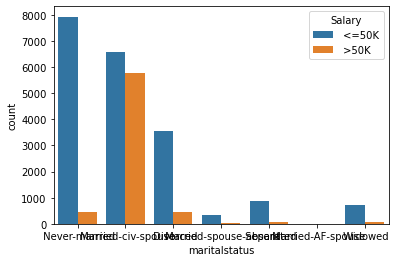

In [76]:
sns.countplot(Salary_train['maritalstatus'], hue=Salary_train['Salary'])

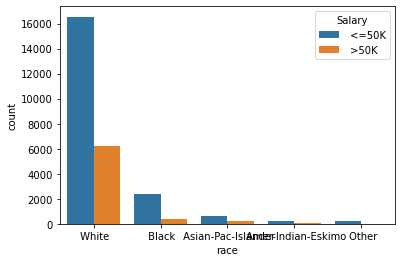

In [77]:
sns.countplot(Salary_train['race'], hue= Salary_train['Salary'])

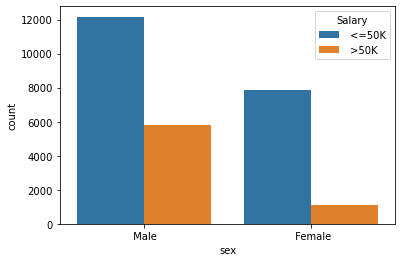

In [78]:
sns.countplot(Salary_train['sex'], hue=Salary_train['Salary'])

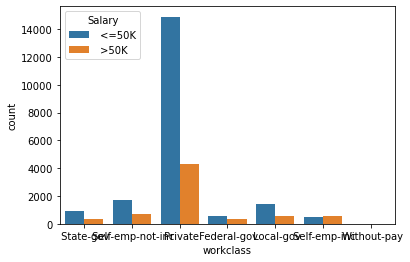

In [79]:
sns.countplot(Salary_train['workclass'], hue=Salary_train['Salary'])

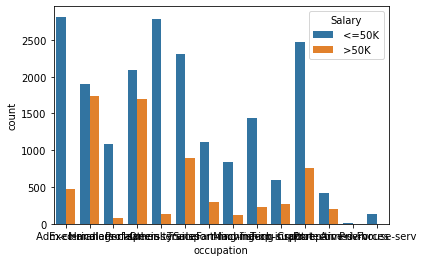

In [80]:
sns.countplot(Salary_train['occupation'], hue= Salary_train['Salary'])

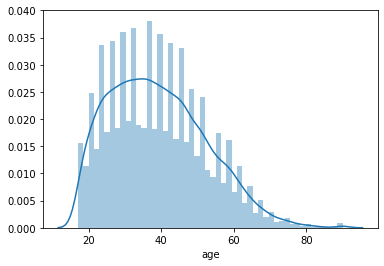

In [81]:
sns.distplot(Salary_train['age'])

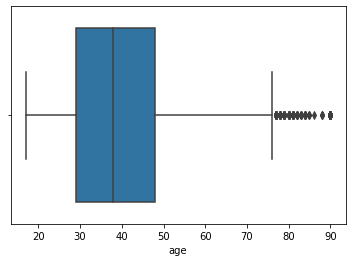

In [82]:
sns.boxplot(Salary_train['age'])

C:\Users\Training Team\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


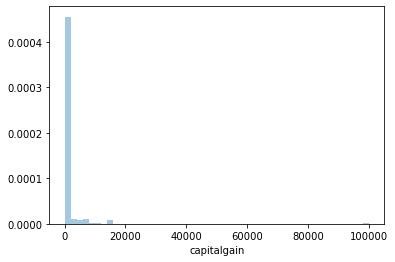

In [83]:
sns.distplot(Salary_train['capitalgain'])

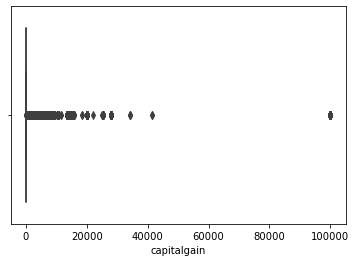

In [84]:
sns.boxplot(Salary_train['capitalgain'])

C:\Users\Training Team\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


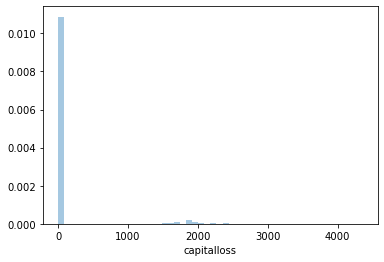

In [85]:
sns.distplot(Salary_train['capitalloss'])

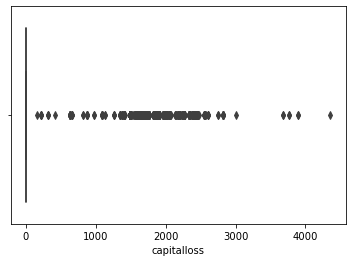

In [86]:
sns.boxplot(Salary_train['capitalloss'])

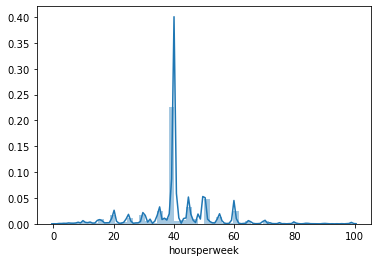

In [87]:
sns.distplot(Salary_train['hoursperweek'])

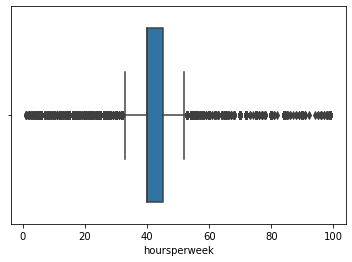

In [88]:
sns.boxplot(Salary_train['hoursperweek'])

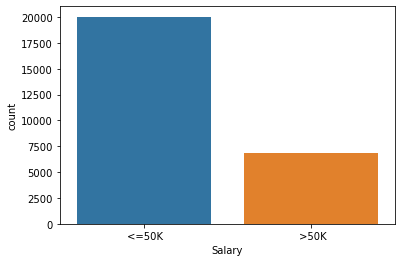

In [89]:
sns.countplot(Salary_train['Salary'])

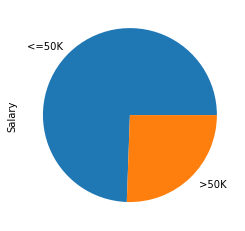

In [90]:
Salary_train['Salary'].value_counts().plot(kind = 'pie' )

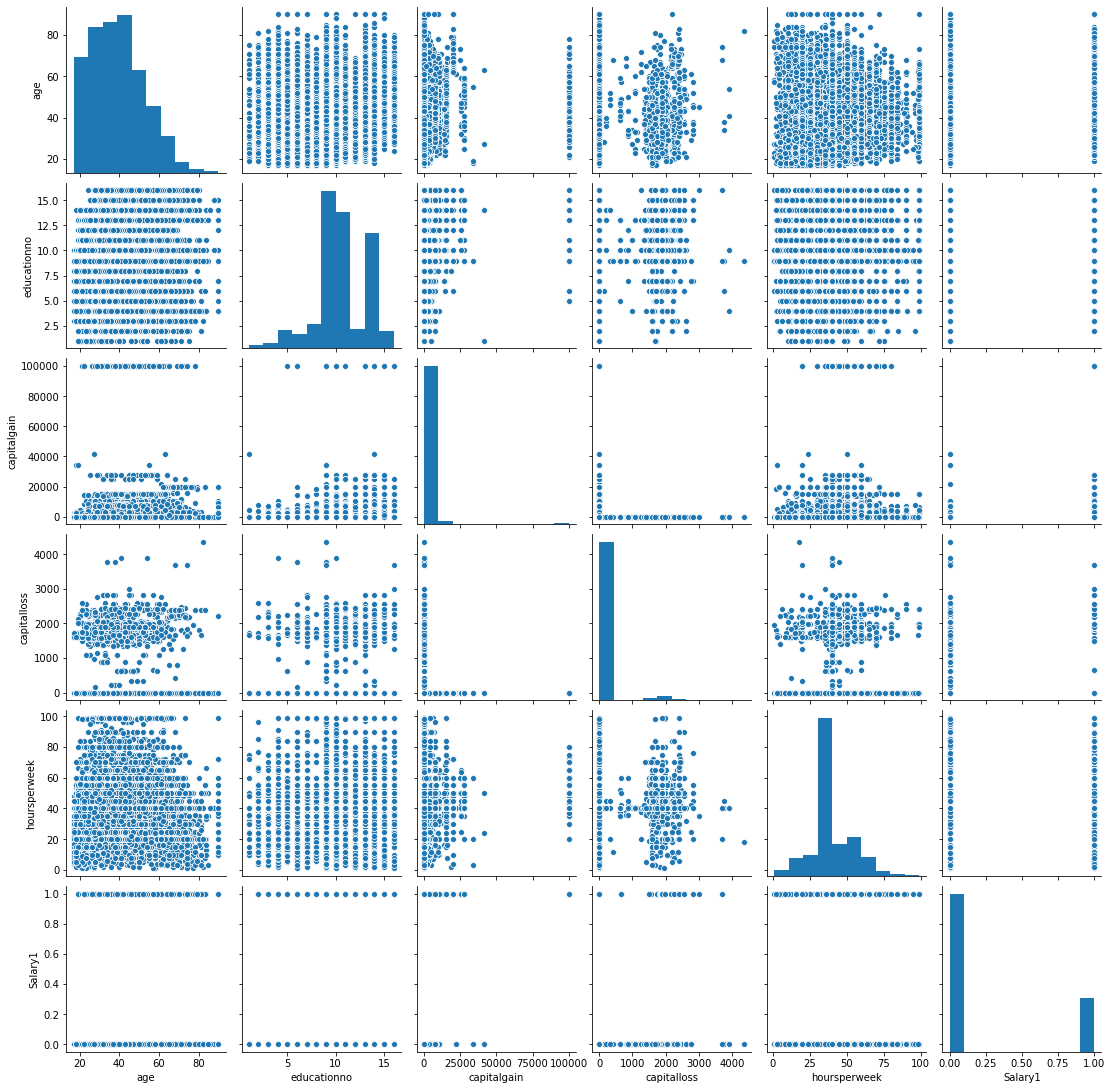

In [91]:
sns.pairplot(Salary_train)

# **Feature Engineering**

In [92]:
# Distributing Training Data in dependant variable and independant variable
X= Salary_train.drop(['Salary', 'Salary1'], axis=1)
y= Salary_train['Salary']
X.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [93]:
X.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


# **Create Pipeline for Preprocessing and classification**

In [94]:
X.columns

Index(['age', 'workclass', 'educationno', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native'],
      dtype='object')

In [95]:
# Numeical transformer
Num_col= ['age', 'capitalgain', 'capitalloss',
       'hoursperweek']
Numerical_Transformer= MinMaxScaler()

In [96]:
# Categorical Transformer
Cat_col= ['workclass', 'educationno', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'native']
Cat_Transformer= OneHotEncoder(handle_unknown='ignore')

In [97]:
Preprocessor= ColumnTransformer(
    transformers= [
                   ('num', Numerical_Transformer, Num_col),
                   ('cat', Cat_Transformer, Cat_col)
    ]
)

In [98]:
pipe= Pipeline(steps=
              [('Preprocessor', Preprocessor)])
x= pipe.fit_transform(X)

In [99]:
x= x.todense()

In [100]:
# Distrubuting Training data into train and test split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

In [101]:
clf= SVC()
clf.fit(x_train, y_train)
print("model score: %.3f" % clf.score(x_test, y_test))

model score: 0.832


# **GridSearchCV**

In [105]:
#Grid Search CV
# poly kernel
param= {'kernel': ['poly'], 'gamma': [1, 0.5],
         'degree': [2], 'C': [1]}

In [106]:
grid= GridSearchCV(clf, param_grid=param, cv=3)
grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1], 'degree': [2], 'gamma': [1, 0.5],
                         'kernel': ['poly']})

In [107]:
grid.best_params_, grid.best_score_

({'C': 1, 'degree': 2, 'gamma': 0.5, 'kernel': 'poly'}, 0.8381191339094879)

In [ ]:
#Grid Search CV
# rbf kernel
param= {'kernel': ['rbf'], 'gamma': [10, 6, 4, 1, 0.5 ],
          'C': [10, 5, 1, 0.1]}


In [ ]:
grid= GridSearchCV(clf, param_grid=param, cv=3)
grid.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [10, 5, 1, 0.1], 'gamma': [10, 6, 4, 1, 0.5],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid.best_params_, grid.best_score_


({'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}, 0.8226930582659605)

In [109]:
# Modelling with the optimum parameters
clf= SVC(kernel= 'poly', C= 1, gamma= 0.5, degree= 2)
clf.fit(x_train,y_train)

SVC(C=1, degree=2, gamma=0.5, kernel='poly')

In [115]:
# Distributing test data in dependant variable and independant variable
X_test= Salary_test.drop(['Salary'], axis=1)
y_test= Salary_test['Salary']
X_test.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States


In [116]:
X_test= pipe.transform(X_test)

In [117]:
X_test=X_test.todense()

In [118]:
X_test

matrix([[0.10958904, 0.        , 0.        , ..., 1.        , 0.        ,
         0.        ],
        [0.28767123, 0.        , 0.        , ..., 1.        , 0.        ,
         0.        ],
        [0.15068493, 0.        , 0.        , ..., 1.        , 0.        ,
         0.        ],
        ...,
        [0.28767123, 0.        , 0.        , ..., 1.        , 0.        ,
         0.        ],
        [0.36986301, 0.05455055, 0.        , ..., 1.        , 0.        ,
         0.        ],
        [0.24657534, 0.        , 0.        , ..., 1.        , 0.        ,
         0.        ]])

In [119]:
y_pred= clf.predict(X_test)
acc= accuracy_score(y_test, y_pred)
print('Accuracy :', acc)
confusion_matrix(y_test, y_pred)

Accuracy : 0.8419674451521585


array([[9815,  805],
       [1428, 2082]], dtype=int64)

**It can be seen that we are getting similar results on train and test data. Hence, model is performing on similar in train and test environment**

In [120]:
filename= 'Final_model'
pickle.dump(clf, open(filename, 'wb'))